In [7]:

#CLASS 1# 
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate

    def Activate(self, stimulus): #Receives a stimulus and calculates a firing rate based on the
        pass                      #strength of that stimulus


#CLASS 2# 
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)               #we call the father init
        self.receptor_type = receptor_type

    def SenseStimulus(self, stimulus):
        activation_level = super().Activate(stimulus)  #activates the neuron based on the strength or type of that stimulus.
        pass

#CLASS 3#
class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)               #we call the father init
        self.target_muscle = target_muscle

    def ControlMuscle(self, activation_level):
        target= super().Activate(activation_level)           #Triggers a response in the target muscle based on the
        pass                                                #neuron’s activation level.

#CLASS 4#
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):             #we call the father init
        super().__init__(firing_rate, receptor_type="light")

    def LightDetection(self, light_intensity):
        rate = super().Activate(light_intensity)   #Receives light intensity as input and activates
        pass                                        #according to light levels.

    

#CLASS 5# 
class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):                     #we call the father init
        super().__init__(firing_rate, receptor_type="pressure")


    #Receives pressure as input and activates in
    #response to the strength of the applied pressure.
    def PressureDetection(self, pressure):
        rate = super().Activate(pressure)
        pass

#CLASS 6#
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):                 #we call the father init
        super().__init__(firing_rate, target_muscle="skeletal muscle")


    #Initiates muscle contraction or movement in
    #response to its activation level.
    def ControlMuscle(self, activation_level):
        help = super().Activate(activation_level)

        pass  

# CLASS 7#
class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):                     #we call the father init
        super().__init__(firing_rate, target_muscle="muscle spindle")
 
    #: Adjusts muscle spindle tension in response
    #to activation, affecting muscle tone.
    def MuscleSpindleControl(self, activation_level):
        help = super().Activate(activation_level)
        pass


In [8]:
pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


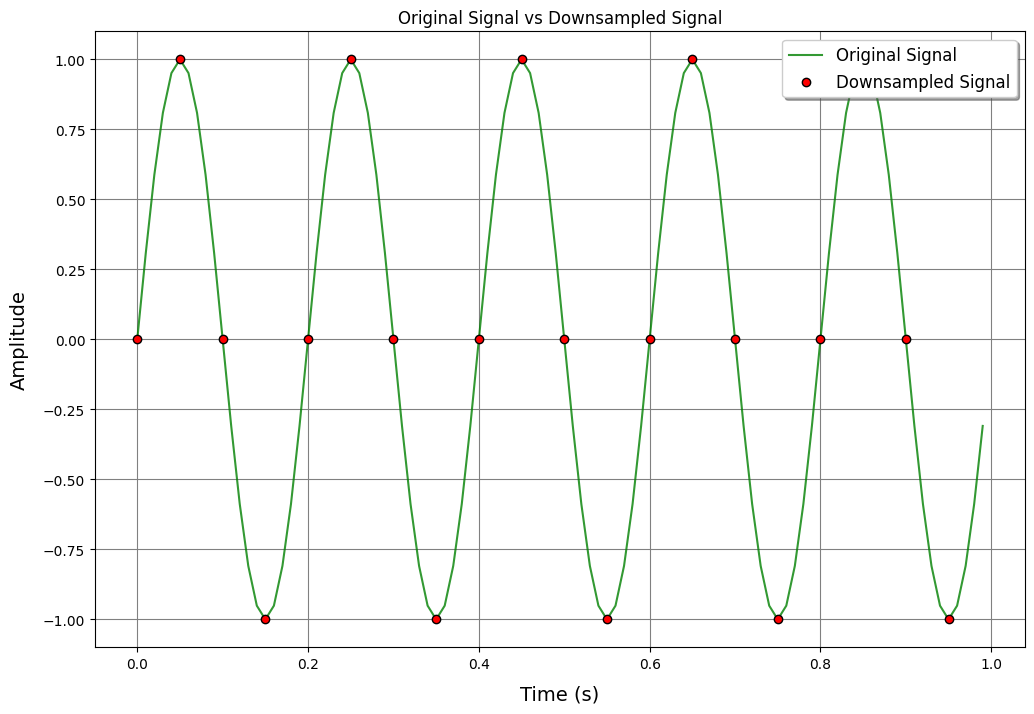

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# we generate a sine wave signal (frequency = 5 Hz, sampled at 100 Hz for 1 second), 
# then we create a DataFrame to store the signal values, the we find the minma and the maxima like what the Q ask. 
# Define indices for downsampling by taking every 5th sample 
# and we combine downsampled indices with maxima and minima indices to preserve key points 
# also we extract the downsampled signal values based on key indices. 

signal = np.sin(2 * np.pi * 5 * np.arange(0, 1, 0.01))
df = pd.DataFrame({'signal': signal})
maxima = df[(df['signal'] > df['signal'].shift(1)) & (df['signal'] > df['signal'].shift(-1))].index
minima = df[(df['signal'] < df['signal'].shift(1)) & (df['signal'] < df['signal'].shift(-1))].index

downsampled_indices = np.arange(0, len(signal), 5)
key_indices = np.sort(np.unique(np.concatenate((downsampled_indices, maxima, minima))))
downsampled_signal = signal[key_indices]
time = np.arange(0, len(signal) * 0.01, 0.01)
downsampled_time = time[key_indices]

plt.figure(figsize=(12, 8))
plt.plot(np.arange(0, 1, 0.01), signal, label="Original Signal",color='green', alpha=0.8)
plt.scatter(downsampled_time, downsampled_signal, color='red', label="Downsampled Signal",edgecolor='black',  zorder=5)
plt.title("Original Signal vs Downsampled Signal")
plt.xlabel("Time (s)", fontsize=14, labelpad=10)
plt.ylabel("Amplitude", fontsize=14, labelpad=10) 
plt.legend(fontsize=12, loc='upper right', shadow=True)
plt.grid(color='gray')
plt.show()

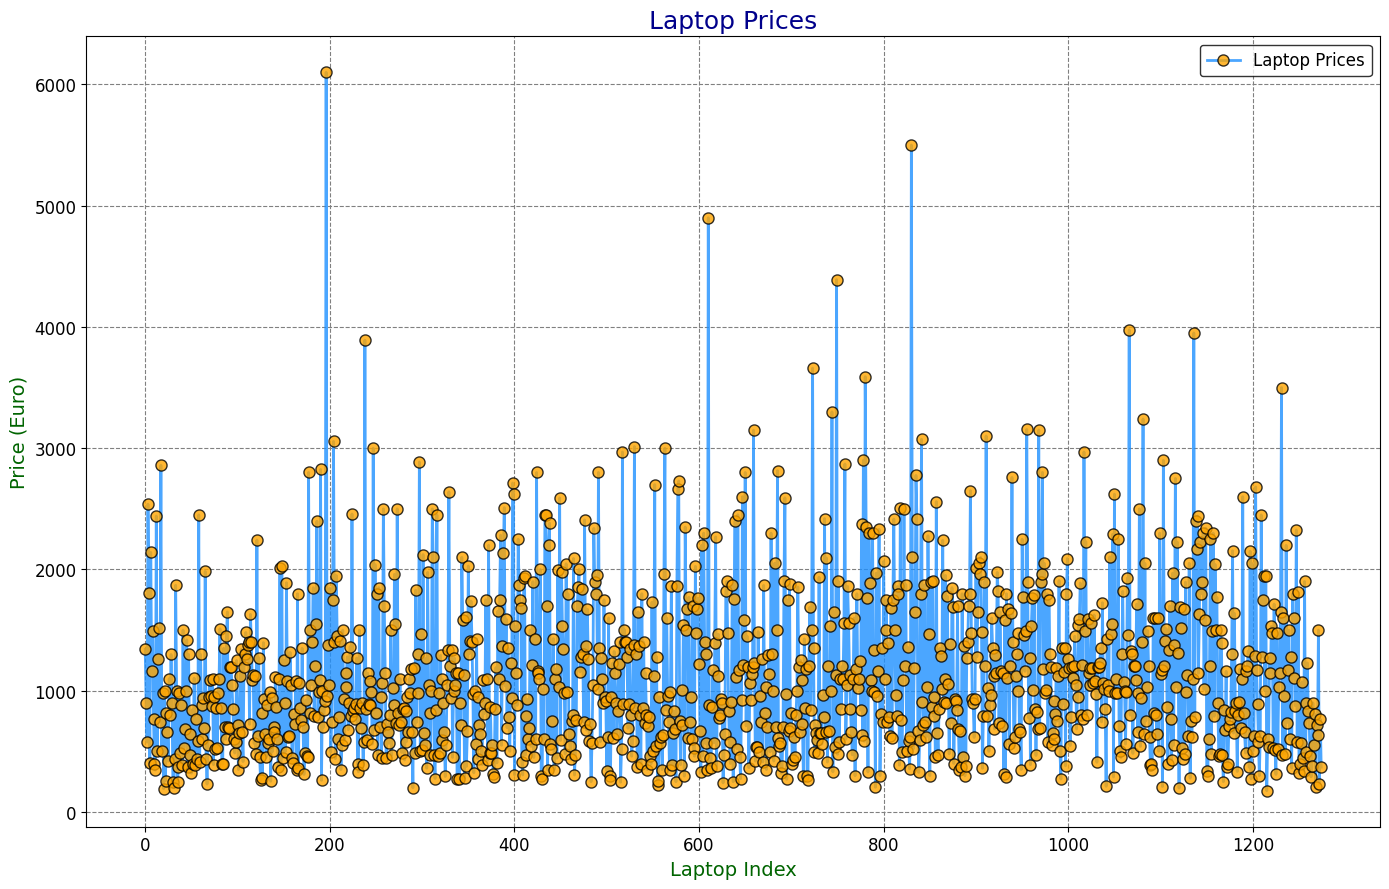

Average Laptop Price by Company:
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64

Company with the most expensive laptops on average:
Razer with an average price of 3346.14 Euros.
Operating Systems before uniform:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
Unique Operating Systems after unifying:
['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


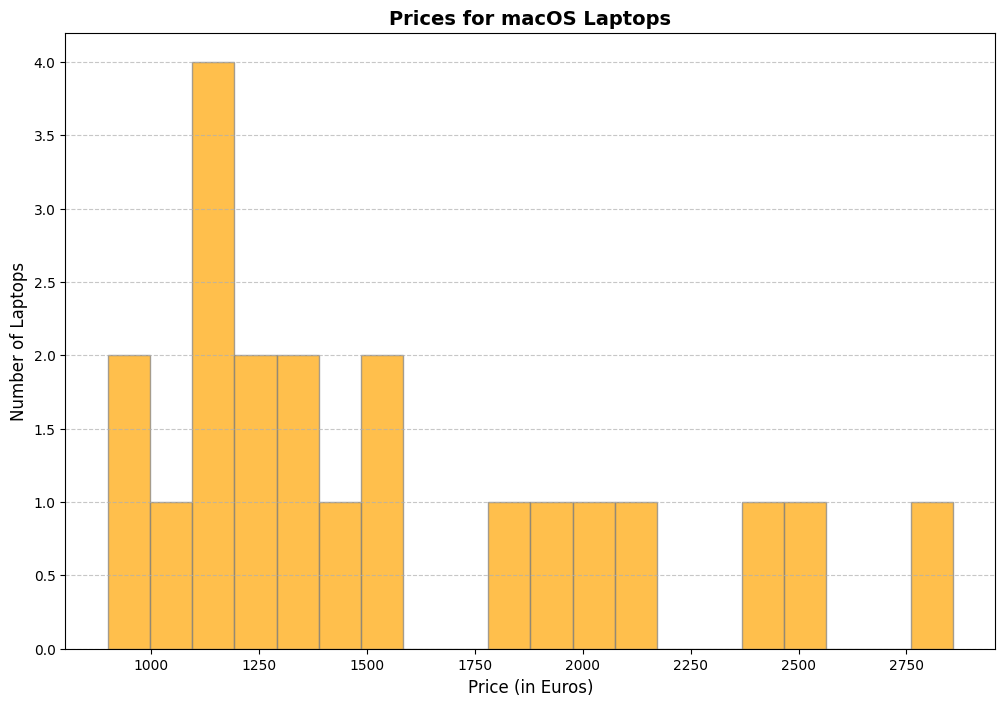

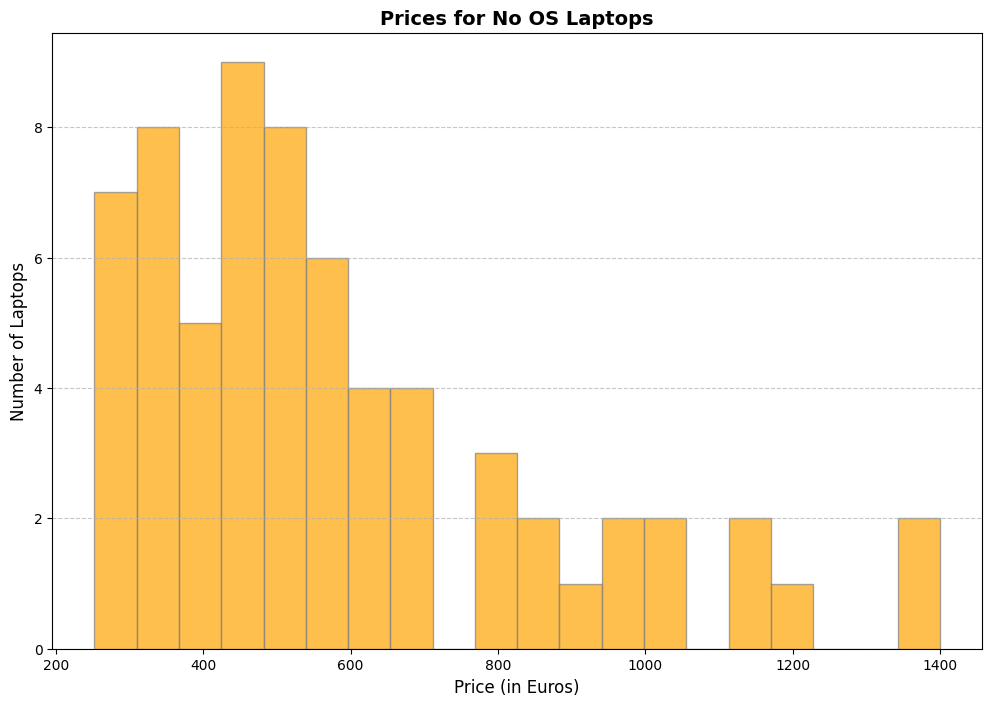

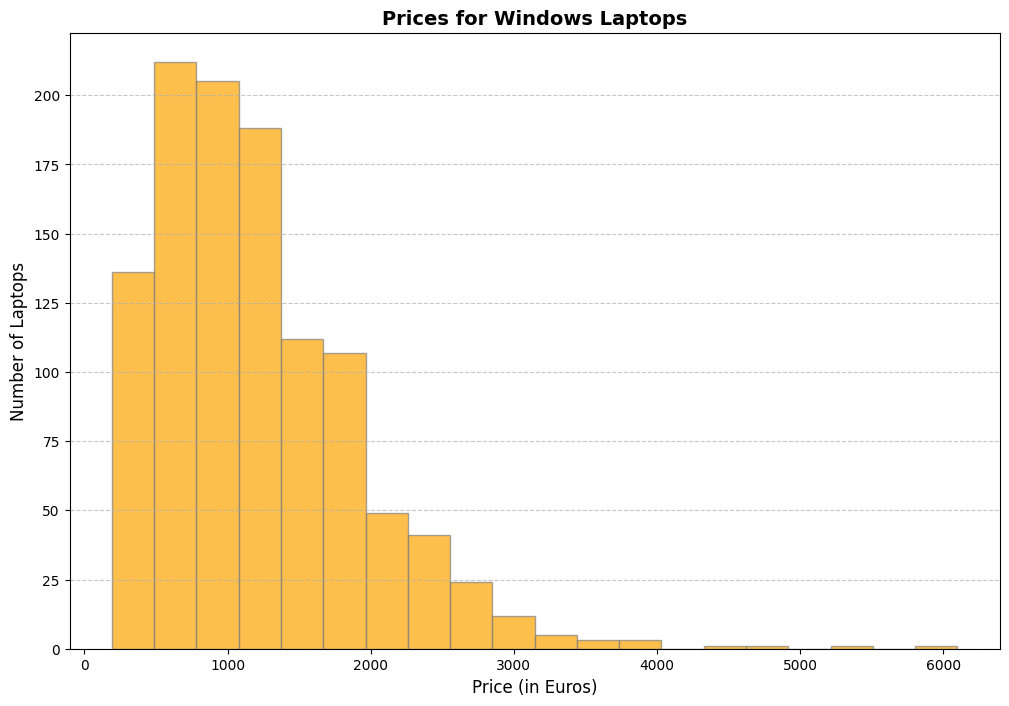

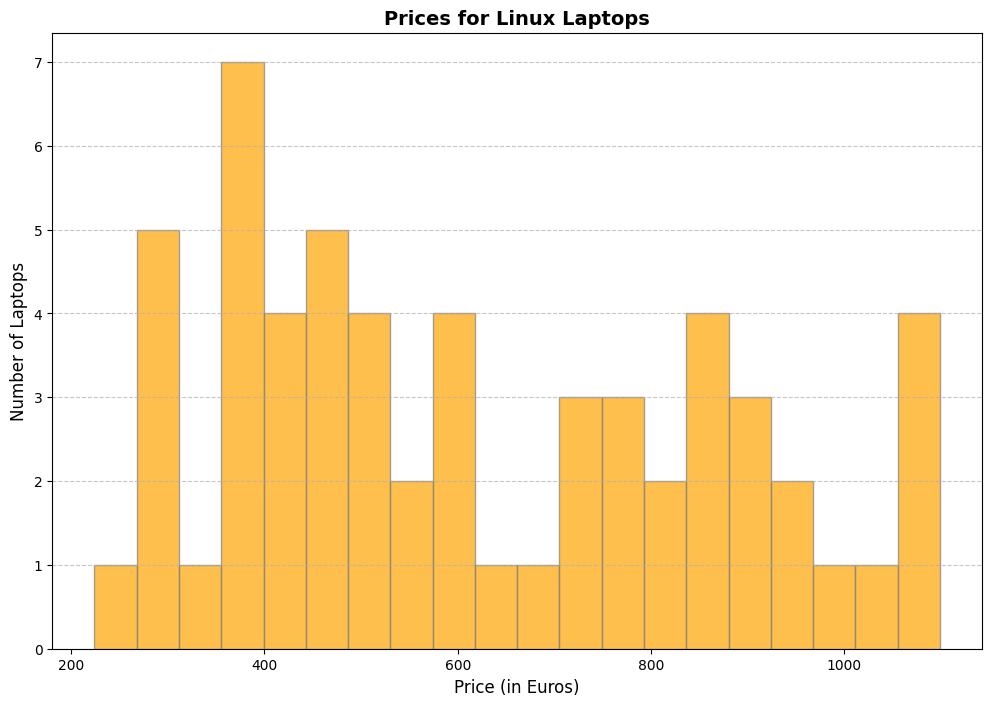

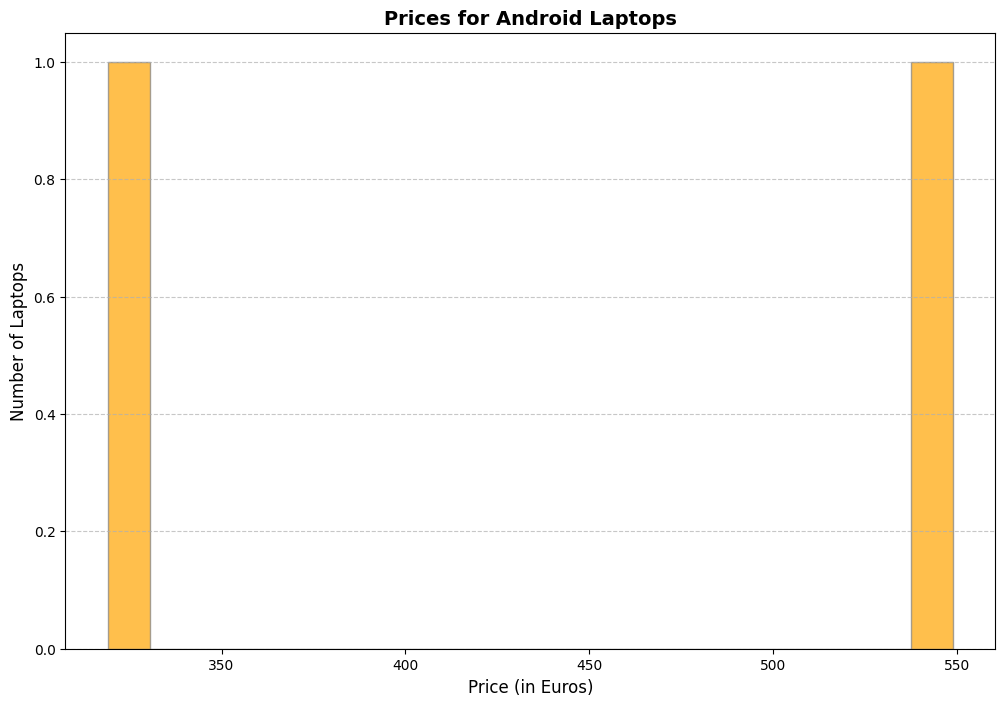

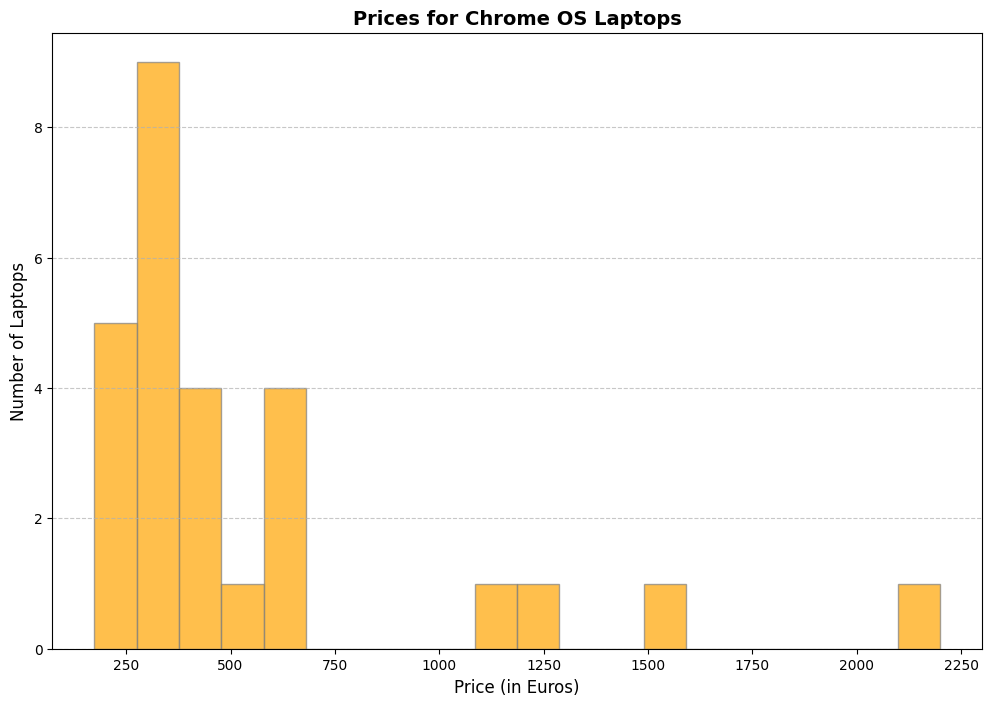

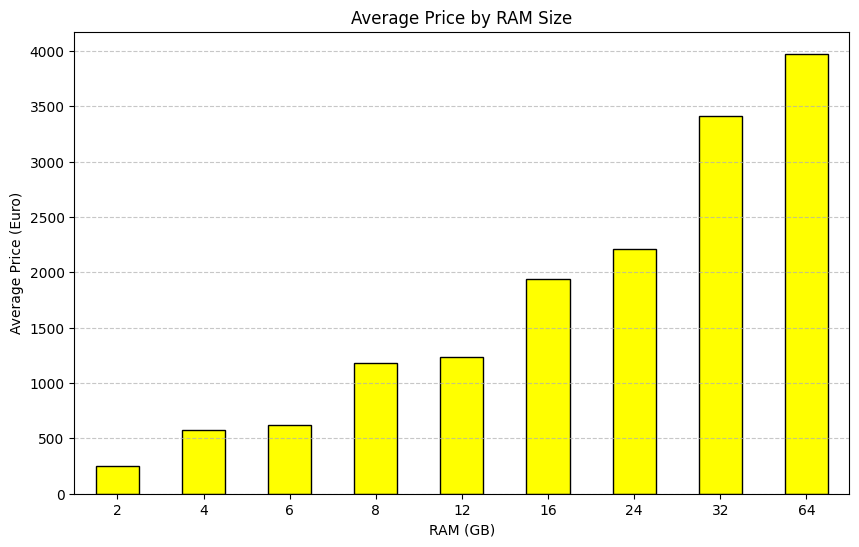

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

laptop_data = pd.read_csv('laptop_price - dataset.csv')         #we read the csv file ans save it into laptop_data


#-------------------1-----------------#

#plot the preces pf the laptops
plt.figure(figsize=(14, 9)) 
plt.plot(laptop_data['Price (Euro)'], 
         marker='o', linestyle='-', linewidth=2, markersize=8, 
         color='dodgerblue', markerfacecolor='orange', markeredgecolor='black', 
         alpha=0.8, label='Laptop Prices')

plt.title("Laptop Prices", fontsize=18, color='darkblue')
plt.xlabel("Laptop Index", fontsize=14,  color='darkgreen')
plt.ylabel("Price (Euro)", fontsize=14,  color='darkgreen')
plt.grid(color='gray', linestyle='--')
plt.legend(fontsize=12, loc='upper right', edgecolor='black')
plt.tick_params(axis='both', labelsize=12, colors='black')
plt.tight_layout()
plt.show()




#-------------------2-----------------#

# we calculate the avereage price for each company
average_prices = laptop_data.groupby('Company')['Price (Euro)'].mean()
most_expensive = average_prices.idxmax()
most_expensive_price = average_prices.max()
print("Average Laptop Price by Company:")
print(average_prices)
print("\nCompany with the most expensive laptops on average:")
print(f"{most_expensive} with an average price of {most_expensive_price:.2f} Euros.")





#-------------------3-----------------#

#first we find all the op system kinds and we print them, then we uniform them  for example 
# we make windows 10 & windows 10 s & windowa 7 all of them become windows 
# then we print the new uniform kinds 
op_sys1 = laptop_data['OpSys'].unique()
print("Operating Systems before uniform:")
print(op_sys1)
laptop_data['OpSys'] = laptop_data['OpSys'].replace({
    'Windows 10 S': 'Windows',
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Mac OS X': 'macOS'
})
laptop_data.to_csv('laptop_price - dataset.csv', index=False) 
op_sys2 = laptop_data['OpSys'].unique()
print("Unique Operating Systems after unifying:")
print(op_sys2)




#-------------------4-----------------#

# we pass on all the uniqe kinds of op sys by for loop and we plot for each one a prce diagram
for op_sys in op_sys2:
    op_sys_data = laptop_data[laptop_data['OpSys'] == op_sys]['Price (Euro)']
    plt.figure(figsize=(12, 8))
    plt.hist(op_sys_data, bins=20, color='orange', edgecolor='gray', alpha=0.7)
    plt.title(f"Prices for {op_sys} Laptops", fontsize=14, fontweight='bold')
    plt.xlabel("Price (in Euros)", fontsize=12)
    plt.ylabel("Number of Laptops", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()





#-------------------5-----------------#

# we calc the avg for each kind of RAM memory and we note that when the RAM is vigger the avg of the price bigger too
# and that is the relationship between RAM and price.
average_price_by_ram = laptop_data.groupby('RAM (GB)')['Price (Euro)'].mean()
plt.figure(figsize=(10, 6))
slope, intercept = np.polyfit(laptop_data["RAM (GB)"], laptop_data["Price (Euro)"], 1)
average_price_by_ram.plot(kind='bar', color='yellow', edgecolor='black')
plt.title("Average Price by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Average Price (Euro)")
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




#-------------------6-----------------#

# first we extract all the kinds of the memory kind and then we pass on all the lines n the file 
# and we add a new coulmn that there is in it the kind of the memory like HDD / SDD / .....
def extracTypes(column):
    unique_types = set()
    for type in column:
        parts = str(type).replace('Flash Storage', 'flashstorage').split()
        storage_types = [word.replace('flashstorage', 'Flash Storage') for word in parts if word.isalpha()]
        unique_types.add(' + '.join(storage_types) if storage_types else 0)
    return sorted(unique_types)


def determineType(memory_string, unique_types):
    if pd.notna(memory_string):
        matched_types = [storage_type for storage_type in unique_types if storage_type in memory_string]
        return ' + '.join(matched_types) if matched_types else 0
    
laptop_data['Storage type'] = laptop_data['Memory'].apply(lambda x: determineType(x, extracTypes(laptop_data['Memory'])))
laptop_data.to_csv('laptop_price - dataset.csv', index=False)